In [1]:
import torch

# PyTorch version
print("PyTorch version:", torch.__version__)

# CUDA availability
print("CUDA available:", torch.cuda.is_available())

# CUDA device name (if available)
if torch.cuda.is_available():
    print("CUDA device:", torch.cuda.get_device_name(0))
    print("CUDA device count:", torch.cuda.device_count())
    print("Current CUDA device index:", torch.cuda.current_device())


PyTorch version: 2.3.0+cu121
CUDA available: True
CUDA device: NVIDIA GeForce RTX 3060
CUDA device count: 1
Current CUDA device index: 0


In [2]:
import pandas as pd

# Read Excel file
df = pd.read_excel("BSMDD_v3_textcleaned - 21K.xlsx")  # Replace with your actual file path

# Display the first few rows
print(df.head())


                                                text  label
0  মানসিক শারীরিকভাবে অসুস্থ ক্লান্ত পুরো জীবন শা...      1
1  দয়া সাথে থাকুন অত্যন্ত দীর্ঘ আপনাকে পড়তে উত্...      1
2  জানতাম সাথে ভুল লোক খারাপ জীবন কাটিয়েছে সম্পূ...      1
3  অনেটিভ ইংরেজি স্পিকারের অনুসরণ বিরক্তিকর অপ্রত...      1
4  অনেটিভ ইংরেজি স্পিকারের অনুসরণ বিরক্তিকর অপ্রত...      1


In [3]:
df.text[200]

'ভাল জানি জীবনকে চুদেছি বুঝতে পারিনি করছিলাম দেরি একজনকে ফাক মানসিক স্বাস্থ্য চোদন মানুষ এটাকে কিভাবে জানি অভিশাপ জগাখিচুড়ি সবকিছুই অভিভূত সবকিছুই ভয় দেখায় মূলত ভয়কে জয় দিই স্কুলে বঞ্চিত বন্ধু সবেমাত্র পাশ করেছি বেশিরভাগ পেয়েছি তারপরে বন্ধুরা সবাই দূরে সরে উদ্বেগের কারণে এলেভেলে ব্যর্থ হয়েছি করছিলাম বোঝার বোকা ছিলাম শিক্ষকদের জিজ্ঞাসা ভয় পেয়েছি এমনকি সাহায্য বন্ধু তৈরি করতেও ভয় পেয়েছি পর্যায়ে পৌঁছেছে অসুস্থ কাটাচ্ছিলাম যতক্ষণ কেবল আসা বন্ধ ভয় হতাশা জয়ী ইস্তফা দিলাম করিনি যতক্ষণ ভয়ে ঘরে থাকতাম খারাপ এমনকি কীভাবে নিয়মিত ব্যক্তি জানি কিভাবে অভিনয় কথা আতঙ্কিত হাল ছেড়ে দিই দুজনকে ফাক বিশ্বাস করতাম ভালবাসা বাঁচাতে চলেছে বয়স বয়ফ্রেন্ড নিজেকে বিশ্বাস করেছিলাম বিশ্বাস করেছিল চলেছে স্বাভাবিক চাকরি পেয়েছিলেন ছোট লক্ষ্য সাহায্য সক্ষম অনুমতি দিয়েছিলাম প্রতিশ্রুতি দিয়েছিলেন একসাথে জায়গা পাবেন একদিন বিয়ে বাড়ির দেখাশোনা পারব প্রস্তুত চাকরি খুঁজে বের পারব করুণ ভীতিকর বিশ্বাস করেছিলাম লুণ্ঠন দিয়েছিলাম লুণ্ঠন অভ্যস্ত হয়েছিলাম বিশ্বাস করেছিলাম একদিন কার্যকর বিয়ে একসাথে আইডি ধী

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21910 entries, 0 to 21909
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21910 non-null  object
 1   label   21910 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 342.5+ KB


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
# 1. Basic Dataset Overview
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns)
print("\nLabel distribution:\n", df['label'].value_counts())

Dataset shape: (21910, 2)

Column names: Index(['text', 'label'], dtype='object')

Label distribution:
 label
1    10961
0    10949
Name: count, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

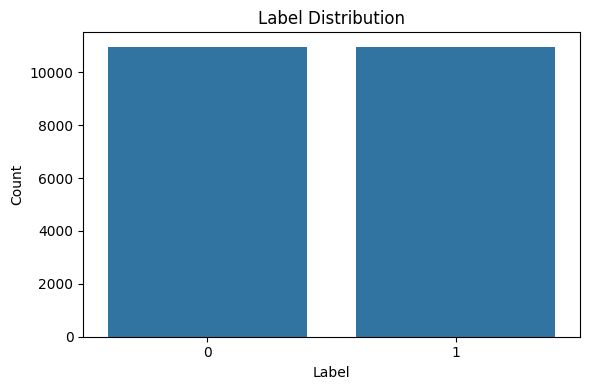

In [8]:
# 2. Plot Label Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [9]:
# 3. Add text length as a feature
df['text_length'] = df['text'].astype(str).apply(len)

# 4. Statistics on Text Length
print("\nText Length Stats:")
print(df['text_length'].describe())



Text Length Stats:
count    21910.000000
mean       551.696257
std        422.189515
min         30.000000
25%        272.000000
50%        421.000000
75%        714.000000
max       4904.000000
Name: text_length, dtype: float64


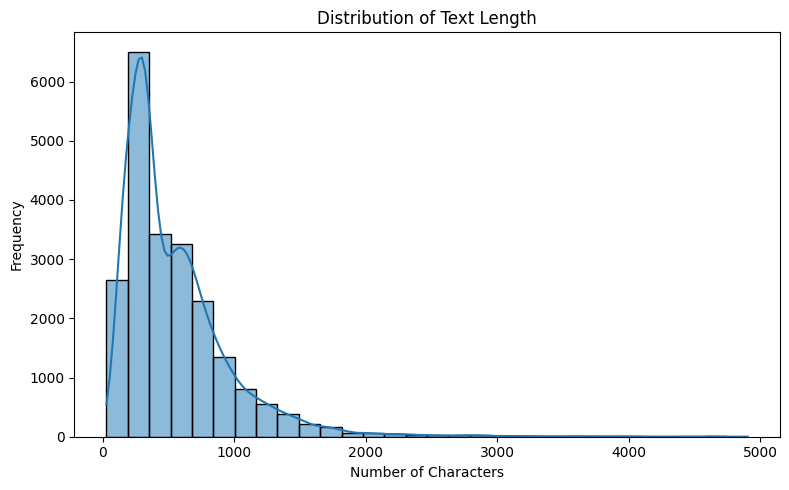

In [10]:
# 5. Histogram of Text Length
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

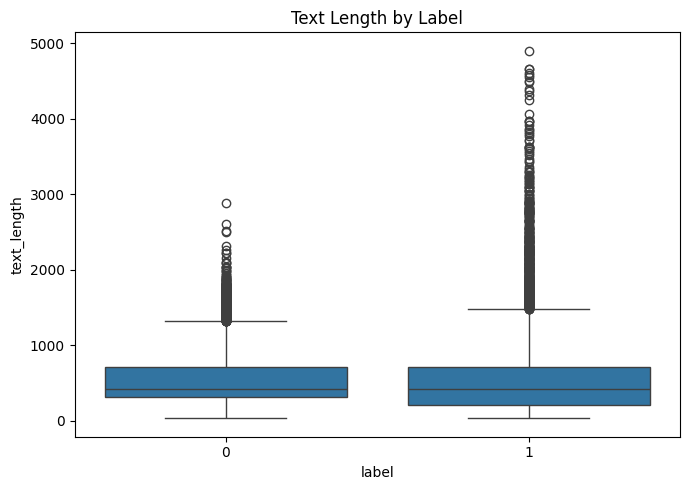

In [11]:
# 6. Boxplot of Text Length by Label
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='label', y='text_length')
plt.title("Text Length by Label")
plt.tight_layout()
plt.show()

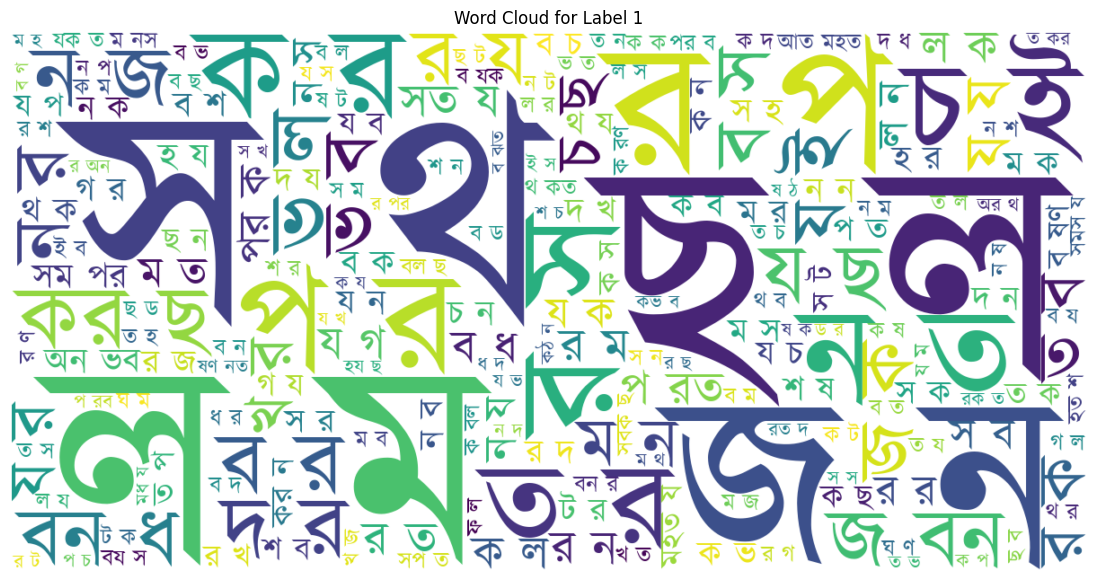

In [15]:
# 7. Word Cloud for Class 1 (if text is in Bengali)
text_class_1 = ' '.join(df[df['label'] == 1]['text'].astype(str))
wordcloud = WordCloud(font_path='Kalpurush/kalpurush.ttf', width=1200, height=600, background_color='white').generate(text_class_1)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Label 1")
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text'], 20)

C:\Users\abdullah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abdullah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abdullah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abdullah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abdullah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2476 (\N{BENG

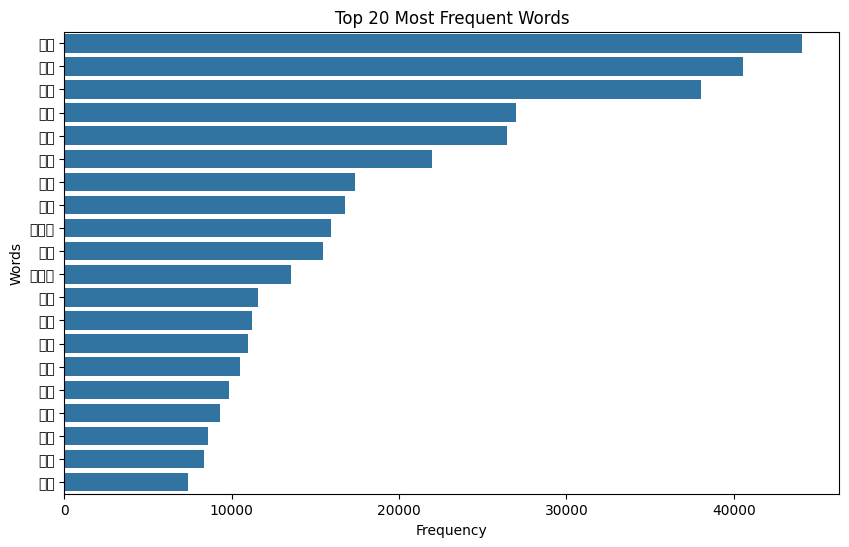

In [18]:
# Plot top unigrams
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [19]:
for label in df['label'].unique():
    print(f"\nTop words for label {label}:")
    top_words = get_top_n_words(df[df['label'] == label]['text'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")


Top words for label 1:
কর: 22045
বন: 21591
পর: 20645
অন: 15778
সম: 12342
বল: 9565
করছ: 9506
রত: 9267
সত: 8967
ভব: 7601

Top words for label 0:
কর: 22061
পর: 19907
বন: 16461
সম: 14080
বল: 12376
অন: 11215
কথ: 8414
সত: 8395
রত: 7472
সময: 6550


In [20]:
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          font_path='kalpurush.ttf').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Label {label}")
    plt.show()

OSError: cannot open resource